# pt-br

# Exemplos de scikit-learn `dtreeviz`

([Veja este caderno no Colab](https://colab.research.google.com/github/parrt/dtreeviz/blob/master/notebooks/dtreeviz_sklearn_visualisations.ipynb))

A biblioteca [dtreeviz](https://github.com/parrt/dtreeviz) foi projetada para ajudar os profissionais de aprendizado de máquina a visualizar e interpretar árvores de decisão e modelos baseados em árvore de decisão, como máquinas de aumento de gradiente.

O objetivo deste notebook é ilustrar os principais recursos e funções da API dtreeviz. Para fazer isso, usaremos o scikit-learn e o conhecido conjunto de dados Titanic para fins ilustrativos. Atualmente, dtreeviz suporta as seguintes bibliotecas de árvore de decisão:

- [scikit-learn](https://scikit-learn.org/stable)
- [XGBoost](https://xgboost.readthedocs.io/en/latest)
- [Spark MLlib](https://spark.apache.org/mllib/)
- [LightGBM](https://lightgbm.readthedocs.io/en/latest/)
- [Tensorflow](https://www.tensorflow.org/decision_forests)

Para interagir com essas diferentes bibliotecas, dtreeviz usa um objeto adaptador, obtido da função `dtreeviz.model()`, para extrair as informações do modelo necessárias para visualização. Dado tal objeto adaptador, toda a funcionalidade dtreeviz está disponível para você usando a mesma interface do programador. A receita básica de uso do dtreeviz é:

1. Importe o dtreeviz e sua biblioteca de árvore de decisão
2. Adquira e carregue dados na memória
3. Treine um classificador ou modelo regressor usando sua biblioteca de árvore de decisão
4. Obtenha um modelo de adaptador dtreeviz usando<br>`viz_model = dtreeviz.model(your_trained_model,...)`
5. Chame as funções dtreeviz, como<br>`viz_model.view()` ou `viz_model.explain_prediction_path(sample_x)`

As quatro categorias de funcionalidade do dtreeviz são:

1. Visualizações em árvore
2. Explicações do caminho de previsão
3. Informações da folha
4. Exploração do espaço de recursos

Agrupamos exemplos de código por [classifiers](#Classifiers) e [regressors](#Regressors), com uma seção de acompanhamento em [partitioning feature space](#Feature-Space-Partitioning).

_Esses exemplos requerem dtreeviz 2.0 ou superior porque o código usa a nova API introduzida em 2.0._


# en-us

# `dtreeviz` scikit-learn Examples

([View this notebook in Colab](https://colab.research.google.com/github/parrt/dtreeviz/blob/master/notebooks/dtreeviz_sklearn_visualisations.ipynb))

The [dtreeviz](https://github.com/parrt/dtreeviz) library is designed to help machine learning practitioners visualize and interpret decision trees and decision-tree-based models, such as gradient boosting machines.

The purpose of this notebook is to illustrate the main capabilities and functions of the dtreeviz API. To do that, we will use scikit-learn and the toy but well-known Titanic data set for illustrative purposes. Currently, dtreeviz supports the following decision tree libraries:

- [scikit-learn](https://scikit-learn.org/stable)
- [XGBoost](https://xgboost.readthedocs.io/en/latest)
- [Spark MLlib](https://spark.apache.org/mllib/)
- [LightGBM](https://lightgbm.readthedocs.io/en/latest/)
- [Tensorflow](https://www.tensorflow.org/decision_forests)

To interopt with these different libraries, dtreeviz uses an adaptor object, obtained from function `dtreeviz.model()`, to extract model information necessary for visualization. Given such an adaptor object, all of the dtreeviz functionality is available to you using the same programmer interface. The basic dtreeviz usage recipe is:

1. Import dtreeviz and your decision tree library
2. Acquire and load data into memory
3. Train a classifier or regressor model using your decision tree library
4. Obtain a dtreeviz adaptor model using<br>`viz_model = dtreeviz.model(your_trained_model,...)`
5. Call dtreeviz functions, such as<br>`viz_model.view()` or `viz_model.explain_prediction_path(sample_x)`

The four categories of dtreeviz functionality are:

1. Tree visualizations
2. Prediction path explanations
3. Leaf information
4. Feature space exploration

We have grouped code examples by [classifiers](#Classifiers) and [regressors](#Regressors), with a follow up section on [partitioning feature space](#Feature-Space-Partitioning).

_These examples require dtreeviz 2.0 or above because the code uses the new API introduced in 2.0._


## Setup


In [1]:
import sys
import os

In [2]:
# %config InlineBackend.figure_format = 'retina' # Make visualizations look good
# #%config InlineBackend.figure_format = 'svg'
# %matplotlib inline

# if 'google.colab' in sys.modules:
#   !pip install -q dtreeviz

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

import dtreeviz

random_state = 1234  # get reproducible trees

## Load Sample Data


In [4]:
# dataset_url = (
#     "https://raw.githubusercontent.com/parrt/dtreeviz/master/data/titanic/titanic.csv"
# )
dataset_url = "../dados./titanic.csv"

dataset = pd.read_csv(dataset_url)

# salvar um bkp dentro da pasta dados
dataset.to_csv("../dados/titanic_bkp.csv")

# Fill missing values for Age
dataset.fillna({"Age": dataset.Age.mean()}, inplace=True)

# Encode categorical variables
dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes
dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes

# Classifiers

To demonstrate classifier decision trees, we trying to model using six features to predict the boolean survived target.


In [5]:
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"

tree_classifier = DecisionTreeClassifier(max_depth=3, random_state=random_state)
tree_classifier.fit(dataset[features].values, dataset[target].values)

DecisionTreeClassifier(max_depth=3, random_state=1234)

In [6]:
dataset

Unnamed: 0  PassengerId  Survived  Pclass  \
0             0            1         0       3   
1             1            2         1       1   
2             2            3         1       3   
3             3            4         1       1   
4             4            5         0       3   
..          ...          ...       ...     ...   
886         886          887         0       2   
887         887          888         1       1   
888         888          889         0       3   
889         889          890         1       1   
890         890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886                              Montvila, Rev. Juozas    male  27.000000   
887                       Graham, Miss. Margaret Edith  female  19.000000   
888           Johnston, Miss. Catherine Helen "Carrie"  female  29.699118   
889                              Behr, Mr. Karl Howell    male  26.000000   
890                                Dooley, Mr. Patrick    male  32.000000   

     SibSp  Parch            Ticket     Fare Cabin Embarked  Sex_label  \
0        1      0         A/5 21171   7.2500   NaN        S          1   
1        1      0          PC 17599  71.2833   C85        C          0   
2        0      0  STON/O2. 3101282   7.9250   NaN        S          0   
3        1      0            113803  53.1000  C123        S          0   
4        0      0            373450   8.0500   NaN        S          1   
..     ...    ...               ...      ...   ...      ...        ...   
886      0      0            211536  13.0000   NaN        S          1   
887      0      0            112053  30.0000   B42        S          0   
888      1      2        W./C. 6607  23.4500   NaN        S          0   
889      0      0            111369  30.0000  C148        C          1   
890      0      0            370376   7.7500   NaN        Q          1   

     Cabin_label  Embarked_label  
0             -1               2  
1             81               0  
2             -1               2  
3             55               2  
4             -1               2  
..           ...             ...  
886           -1               2  
887           30               2  
888           -1               2  
889           60               0  
890           -1               1  

[891 rows x 16 columns]

## Initialize dtreeviz model (adaptor)

To adapt dtreeviz to a specific model, use the `model()` function to get an adaptor. You'll need to provide the model, X/y data, feature names, target name, and target class names:


In [7]:
viz_model = dtreeviz.model(
    tree_classifier,
    X_train=dataset[features],
    y_train=dataset[target],
    feature_names=features,
    target_name=target,
    class_names=["perish", "survive"],
)

We'll use this model to demonstrate dtreeviz functionality in the following sections; the code will look the same for any decision tree library once we have this model adaptor.


## Tree structure visualizations


To show the decision tree structure using the default visualization, call `view()`:


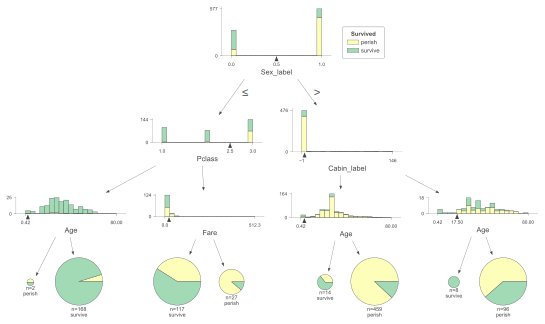

In [8]:
viz_model.view(scale=0.8)

To change the visualization, you can pass parameters, such as changing the orientation to left-to-right:


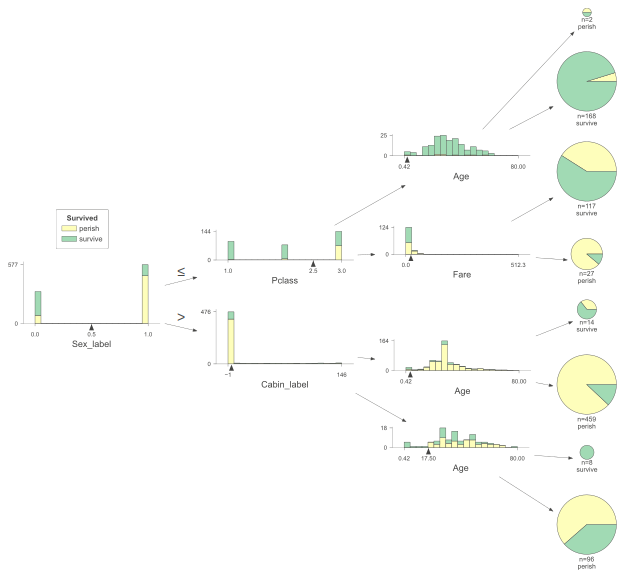

In [9]:
viz_model.view(orientation="LR")

To visualize larger trees, you can reduce the amount of detail by turning off the fancy view:


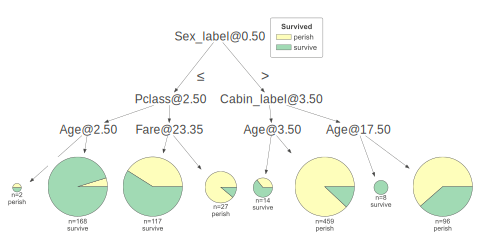

In [10]:
viz_model.view(fancy=False)

Another way to reduce the visualization size is to specify the tree depths of interest:


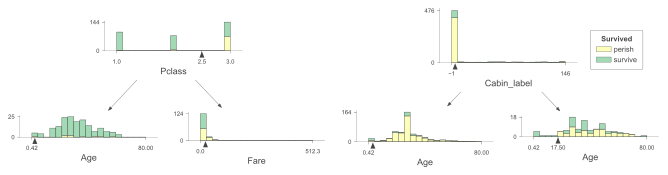

In [11]:
viz_model.view(depth_range_to_display=(1, 2))  # root is level 0

## Prediction path explanations

For interpretation purposes, we often want to understand how a tree behaves for a specific instance. Let's pick a specific instance:


In [12]:
x = dataset[features].iloc[10]
x

Pclass              3.0
Age                 4.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Name: 10, dtype: float64

and then display the path through the tree structure:


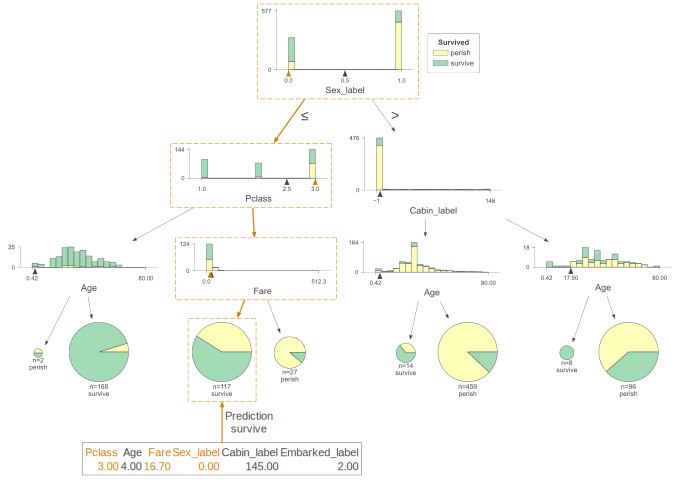

In [13]:
viz_model.view(x=x)

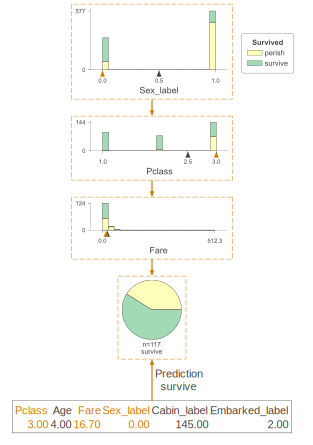

In [14]:
viz_model.view(x=x, show_just_path=True)

You can also get a string representation explaining the comparisons made as an instance is run down the tree:


In [15]:
print(viz_model.explain_prediction_path(x))

2.5 <= Pclass 
Fare < 23.35
Sex_label < 0.5



If you'd like the feature importance for a specific instance, as calculated by the underlying decision tree library, use `instance_feature_importance()`:


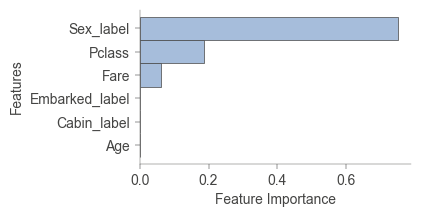

In [16]:
viz_model.instance_feature_importance(x, figsize=(3.5, 2))

## Leaf info

There are a number of functions to get information about the leaves of the tree.

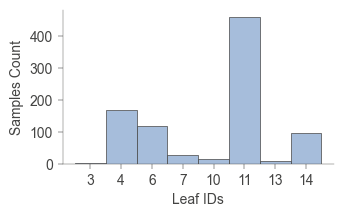

In [17]:
viz_model.leaf_sizes(figsize=(3.5, 2))

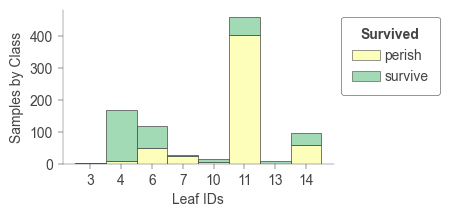

In [18]:
viz_model.ctree_leaf_distributions(figsize=(3.5, 2))

In [19]:
viz_model.node_stats(node_id=6)

Pclass        Age       Fare  Sex_label  Cabin_label  Embarked_label
count   117.0      117.0      117.0      117.0        117.0           117.0
mean      3.0  23.976667  11.722829        0.0     6.196581         1.34188
std       0.0  10.534377   4.695136        0.0    31.167855        0.789614
min       3.0       0.75       6.75        0.0         -1.0             0.0
25%       3.0       18.0      7.775        0.0         -1.0             1.0
50%       3.0       27.0     9.5875        0.0         -1.0             2.0
75%       3.0  29.699118       15.5        0.0         -1.0             2.0
max       3.0       63.0      23.25        0.0        145.0             2.0

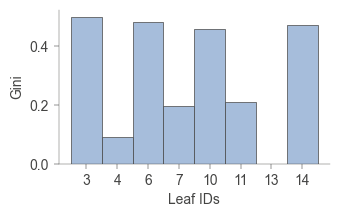

In [20]:
viz_model.leaf_purity(figsize=(3.5, 2))

# Regressors

To demonstrate regressor tree visualization, we start by creating a regressors model that predicts age instead of survival:


In [21]:
features_reg = [
    "Pclass",
    "Fare",
    "Sex_label",
    "Cabin_label",
    "Embarked_label",
    "Survived",
]
target_reg = "Age"

tree_regressor = DecisionTreeRegressor(
    max_depth=3, random_state=random_state, criterion="absolute_error"
)
tree_regressor.fit(dataset[features_reg].values, dataset[target_reg].values)

DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                      random_state=1234)

## Initialize dtreeviz model (adaptor)


In [22]:
viz_rmodel = dtreeviz.model(
    model=tree_regressor,
    X_train=dataset[features_reg],
    y_train=dataset[target_reg],
    feature_names=features_reg,
    target_name=target_reg,
)

## Tree structure visualisations


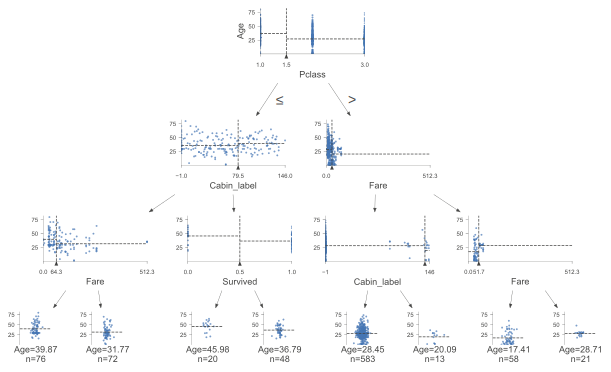

In [23]:
viz_rmodel.view()

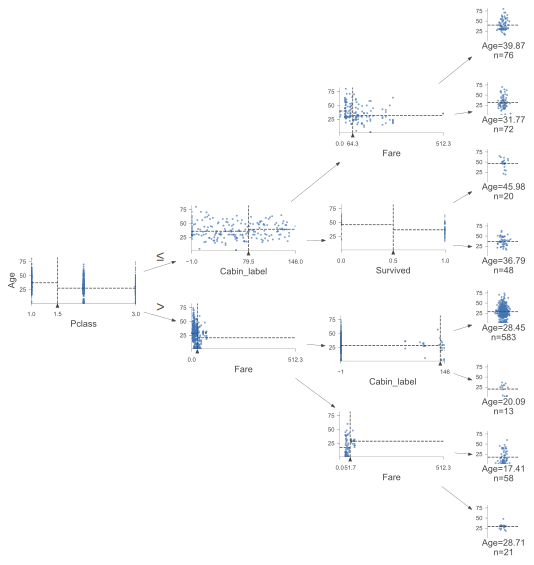

In [24]:
viz_rmodel.view(orientation="LR")

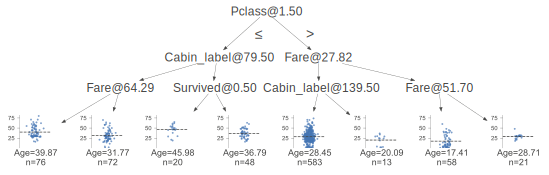

In [25]:
viz_rmodel.view(fancy=False)

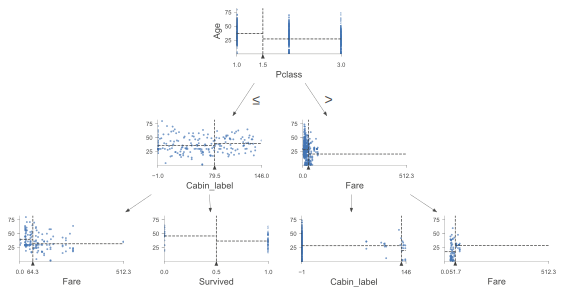

In [26]:
viz_rmodel.view(depth_range_to_display=(0, 2))

## Prediction path explanations


In [27]:
x = dataset[features_reg].iloc[10]
x

Pclass              3.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Survived            1.0
Name: 10, dtype: float64

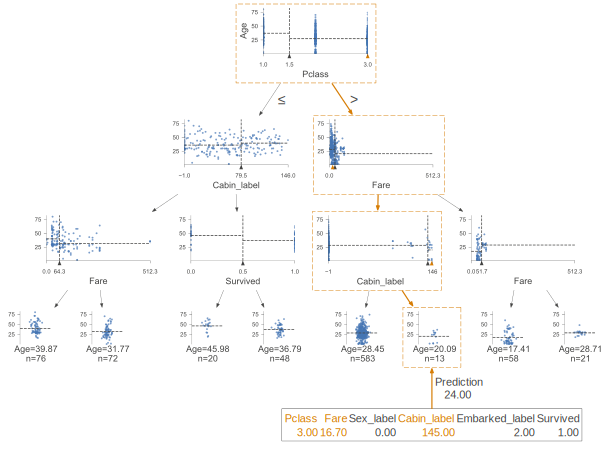

In [28]:
viz_rmodel.view(x=x)

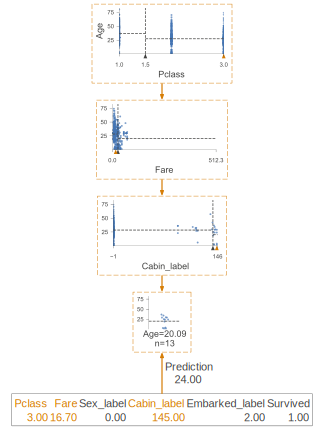

In [29]:
viz_rmodel.view(show_just_path=True, x=x)

In [30]:
print(viz_rmodel.explain_prediction_path(x))

1.5 <= Pclass 
Fare < 27.82
139.5 <= Cabin_label 



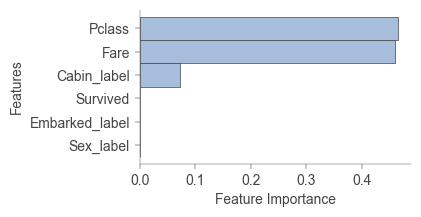

In [31]:
viz_rmodel.instance_feature_importance(x, figsize=(3.5, 2))

## Leaf info


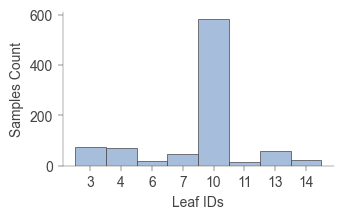

In [32]:
viz_rmodel.leaf_sizes(figsize=(3.5, 2))

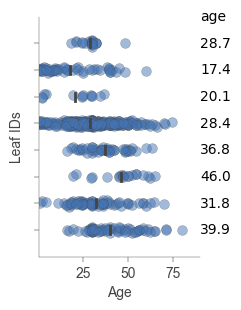

In [33]:
viz_rmodel.rtree_leaf_distributions()

In [34]:
viz_rmodel.node_stats(node_id=4)

Pclass        Fare  Sex_label  Cabin_label  Embarked_label  Survived
count    72.0        72.0       72.0         72.0            72.0      72.0
mean      1.0  152.167936   0.347222        39.25        0.916667  0.763889
std       0.0   97.808005   0.479428    26.556742        1.031203  0.427672
min       1.0        66.6        0.0         -1.0            -1.0       0.0
25%       1.0     83.1583        0.0        20.75             0.0       1.0
50%       1.0       120.0        0.0         40.0             0.0       1.0
75%       1.0    211.3375        1.0         63.0             2.0       1.0
max       1.0    512.3292        1.0         79.0             2.0       1.0

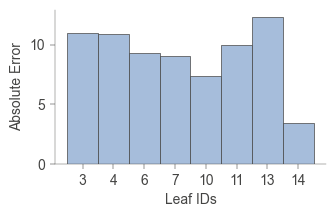

In [35]:
viz_rmodel.leaf_purity(figsize=(3.5, 2))

# Feature Space Partitioning

Decision trees partition feature space in such a way as to maximize target value purity for the instances associated with a node. It's often useful to visualize the feature space partitioning, although it's not feasible to visualize more than a couple of dimensions.


## Classification

To visualize how it decision tree partitions a single feature, let's train a shallow decision tree classifier using the toy Iris data.


In [36]:
from sklearn.datasets import load_iris

iris = load_iris()
features = list(iris.feature_names)
class_names = iris.target_names
X = iris.data
y = iris.target

In [37]:
dtc_iris = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1, random_state=666)
dtc_iris.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=666)

In [38]:
viz_model = dtreeviz.model(
    dtc_iris,
    X_train=X,
    y_train=y,
    feature_names=features,
    target_name="iris",
    class_names=class_names,
)

The following diagram indicates that the decision tree splits the petal width feature into three mostly-pure regions (using `random_state` above to get the same tree each time):


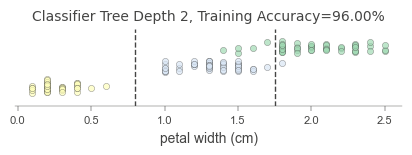

In [39]:
viz_model.ctree_feature_space(
    show={"splits", "title"}, features=["petal width (cm)"], figsize=(5, 1)
)

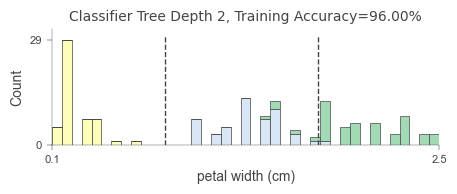

In [40]:
viz_model.ctree_feature_space(
    nbins=40,
    gtype="barstacked",
    show={"splits", "title"},
    features=["petal width (cm)"],
    figsize=(5, 1.5),
)

A deeper tree gives this finer grand partitioning of the single feature space:


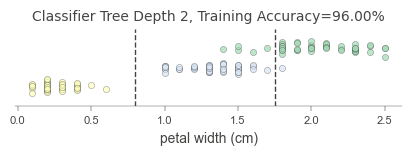

In [41]:
viz_model.ctree_feature_space(
    show={"splits", "title"}, features=["petal width (cm)"], figsize=(5, 1)
)

Let's look at how a decision tree partitions two-dimensional feature space.


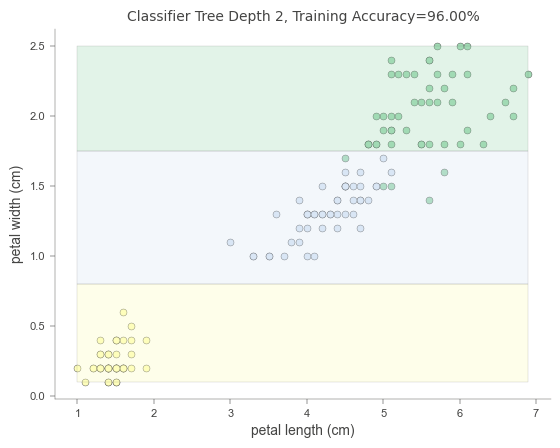

In [42]:
viz_model.ctree_feature_space(
    show={"splits", "title"}, features=["petal length (cm)", "petal width (cm)"]
)

## Regression

To demonstrate regression, let's load a toy Cars data set and visualize the partitioning of univariate and bivariate feature spaces.


In [43]:
dataset_url = "https://raw.githubusercontent.com/parrt/dtreeviz/master/data/cars.csv"
df_cars = pd.read_csv(dataset_url)
X = df_cars.drop("MPG", axis=1)
y = df_cars["MPG"]
features = list(X.columns)

In [44]:
dtr_cars = DecisionTreeRegressor(max_depth=3, criterion="absolute_error")
dtr_cars.fit(X.values, y.values)

DecisionTreeRegressor(criterion='absolute_error', max_depth=3)

In [45]:
viz_rmodel = dtreeviz.model(dtr_cars, X, y, feature_names=features, target_name="MPG")

The following visualization illustrates how the decision tree breaks up the `WGT` (car weight) in order to get relatively pure `MPG` (miles per gallon) target values.


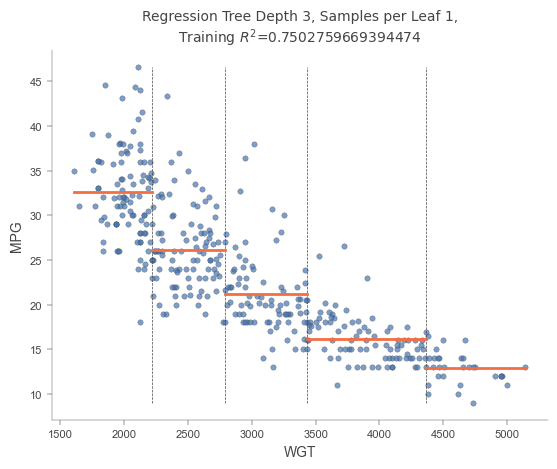

In [46]:
viz_rmodel.rtree_feature_space(features=["WGT"])

In order to visualize two-dimensional feature space, we can draw in three dimensions:


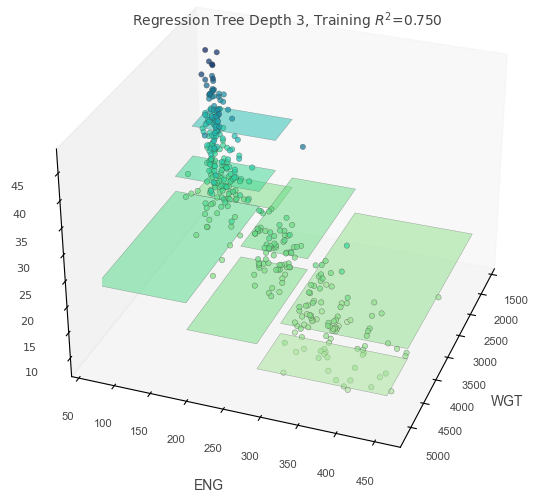

In [47]:
viz_rmodel.rtree_feature_space3D(
    features=["WGT", "ENG"],
    fontsize=10,
    elev=30,
    azim=20,
    show={"splits", "title"},
    colors={"tessellation_alpha": 0.5},
)

Equivalently, we can show a heat map as if we were looking at the three-dimensional plot from the top down:


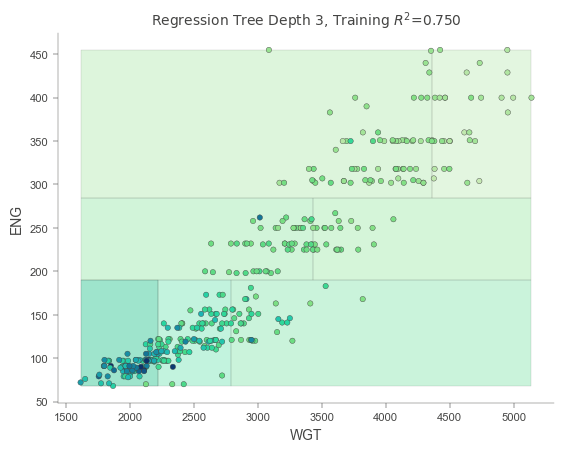

In [48]:
viz_rmodel.rtree_feature_space(features=["WGT", "ENG"])